In [1]:
import numpy as np
import matplotlib.pyplot as plt

|material | width |
|:----:|:----:|
|Quartz | 3mm |
|HfO2 | 25.71nm |
|Ag-Ge | 11.74nm |
|SiO2 | 107.1nm |
|HfO2 | 14.59nm |
|Ag-Ge | 11.91nm |
|SiO2 | 130.66nm |
|Al2O3 | 9.74nm |
|HfO2  | 78.12nm |
|Al2O3 | 125.49nm |
|HfO2 | 58.13nm |
|Al2O3 | 64.22nm |

In [2]:
def n_al2o3(wl):
    nsq = 1 + 1.4313493*wl**2/(wl**2-0.0726631**2) + 0.65054713*wl**2/(wl**2-0.1193242**2) + 5.3414021*wl**2/(wl**2-18.028251**2)
    return np.sqrt(nsq)
def n_sio2(wl):
    nsq = 1 + 0.6961663*wl**2/(wl**2-0.0684043**2) + 0.4079426*wl**2/(wl**2-0.1162414**2) + 0.8974794*wl**2/(wl**2-9.896161**2)
    return np.sqrt(nsq)

C:\Users\chihw\AppData\Local\Temp\ipykernel_2996\892267307.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsq)


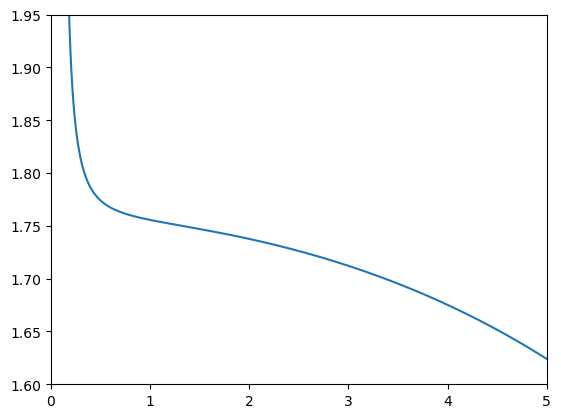

In [3]:
wl = np.linspace(0.1,5,500)
plt.ylim(1.6,1.95)
plt.xlim(0,5)
plt.plot(wl, n_al2o3(wl))

In [4]:
def n_hfo2(wl):
    return 1.875 + 6.28e-3/(wl**2) + 5.8e-4/(wl**4)

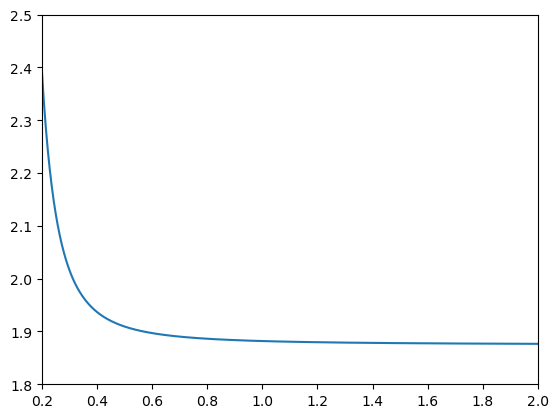

In [5]:
wl = np.linspace(0.2,2,500)
plt.ylim(1.8,2.5)
plt.xlim(0.2,2)
plt.plot(wl, n_hfo2(wl))

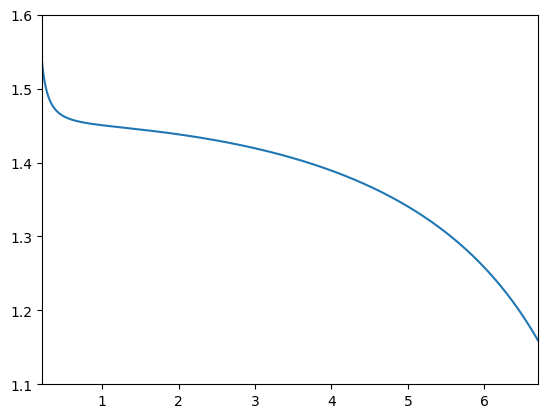

In [6]:
wl = np.linspace(0.21,6.7,500)
plt.ylim(1.1,1.6)
plt.xlim(0.21,6.7)
plt.plot(wl, n_sio2(wl))

In [7]:
def Tr_M(nl, dl, k):
    TI = np.array([[(nl[0]+1)/(2*nl[0]), (nl[0]-1)/(2*nl[0])], [(nl[0]-1)/(2*nl[0]), (nl[0]+1)/(2*nl[0])]])
    TD = np.array([[np.exp(1j*nl[0]*k*dl[0]),0],[0,np.exp(-1j*nl[0]*k*dl[0])]])
    TM = TD @ TI
    for i, n in enumerate(nl):
        if (i+1) < len(nl):            
            n1 = n
            n2 = nl[i+1]
            d = dl[i+1]
            TI = np.array([[(n2+n1)/(2*n2), (n2-n1)/(2*n2)], [(n2-n1)/(2*n2), (n2+n1)/(2*n2)]])
            TD = np.array([[np.exp(1j*n2*k*d),0],[0,np.exp(-1j*n2*k*d)]])
            TM = (TD @ TI) @ TM
    n1 = nl[-1]
    n2 = 1
    TI = np.array([[(n2+n1)/(2*n2), (n2-n1)/(2*n2)], [(n2-n1)/(2*n2), (n2+n1)/(2*n2)]])
    TM = TI @ TM
    return -TM[1,0]/TM[1,1], TM[0,0] - TM[0,1]*TM[1,0]/TM[1,1]

In [37]:
l0 = 1.55
nl = [3,1,3,1,3,1,3]
dl = [l0/4/3,l0/4,l0/4/3,l0/4,l0/4/3,l0/4,l0/4/3]

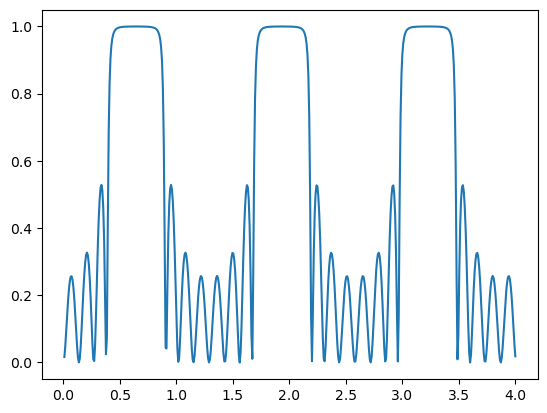

In [41]:
fl = np.linspace(0.01,4,500)
Tcl = []
Rcl = []
for f in fl:
    Rc, Tc = Tran_matrix(nl,dl,2*np.pi*f)
    Tcl.append(np.abs(Tc)**2)
    Rcl.append(np.abs(Rc)**2)
#plt.plot(fl,Tcl)
plt.plot(fl,Rcl)

|material | width |
|:----:|:----:|
|Quartz | 3mm |
|HfO2 | 25.71nm |
|Ag-Ge | 11.74nm |
|SiO2 | 107.1nm |
|HfO2 | 14.59nm |
|Ag-Ge | 11.91nm |
|SiO2 | 130.66nm |
|Al2O3 | 9.74nm |
|HfO2  | 78.12nm |
|Al2O3 | 125.49nm |
|HfO2 | 58.13nm |
|Al2O3 | 64.22nm |

In [8]:
dl_ml = np.array([0.02571,0.01174,0.1071,0.01459,0.01191,0.13066,0.00974,0.07812,0.12549,0.05813,0.06422])

In [22]:
def TrM_ml(wl):
    n1 = n_sio2(wl)
    n2 = n_hfo2(wl)
    n3 = n_al2o3(wl)
    nl_ml = np.array([n2,1,n1,n2,1,n1,n3,n2,n3,n2,n3])
    Rc, Tc = Tr_M(nl_ml, dl_ml, 2*np.pi/wl)
    return np.abs(Rc)**2, np.abs(Tc)**2

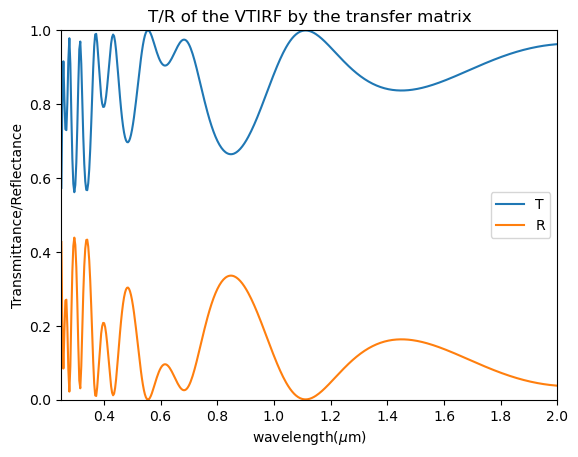

In [25]:
wll = np.linspace(0.25,2,500)
Tcl = []
Rcl = []
for wl in wll:
    Rc, Tc = TrM_ml(wl)
    Tcl.append(Tc)
    Rcl.append(Rc)
#plt.plot(fl,Tcl)
plt.xlim(0.25,2)
plt.ylim(0,1)
plt.xlabel("wavelength($\mu$m)")
plt.ylabel("Transmittance/Reflectance")
plt.plot(wll,Tcl, label='T')
plt.plot(wll,Rcl, label='R')
plt.title("T/R of the VTIRF by the transfer matrix")
plt.legend()
plt.savefig("T_R_mlayer_v1.png")